# Computer Vision - P3_2


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

In [33]:
from skimage import io
from skimage import segmentation
from skimage import img_as_float
from matplotlib import pyplot as plt

In [43]:
def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray', vmin=0, vmax=255)

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


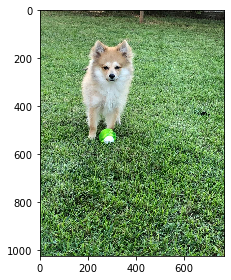

In [55]:
image = io.imread("images/rocki.jpeg")
io.imshow(image)

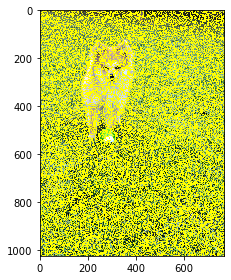

In [44]:
im_segmentation = segmentation.felzenszwalb(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



There is no need to convert images to grayscale.

Its not critical to convert image to float

Optimal values are: For the parameters we tried, we think that optimal values are sigma=0.5 and scale=1000. We diceide those are the best as principal elements of the image are segmented succesfully (dog, ball, ...)

*Sigma*: Refears to the diameter of a Gaussin kernel used for smoothing the image before segmentation. As colors are more homogeniuos as sigma increase, close elements become more agroupable.

*Scale*: Scale parameter determines indirectly the number and size of segments.


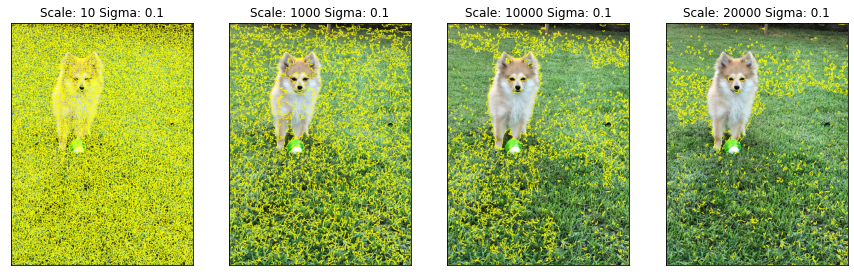

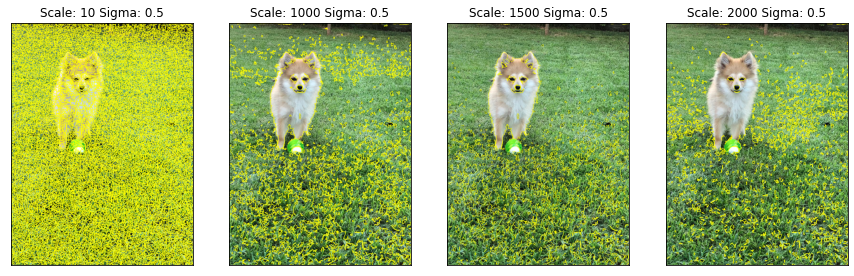

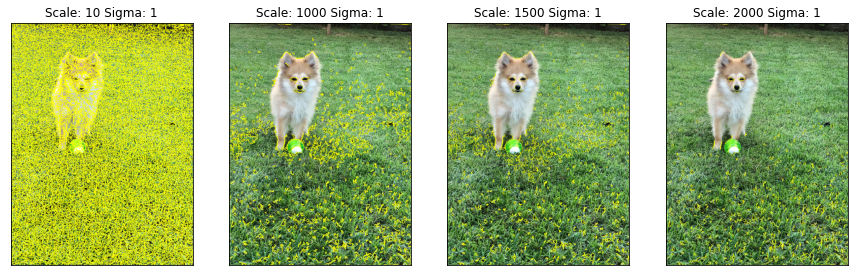

In [59]:
#scale, sigma, min_size


im_segmentation = segmentation.felzenszwalb(image, scale=10, sigma=0.1)
sc1sig1 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=1000, sigma=0.1)
sc10sig1 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=10000, sigma=0.1)
sc100sig1 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=20000, sigma=0.1)
sc1000sig1 = segmentation.mark_boundaries(image, im_segmentation)


im_segmentation = segmentation.felzenszwalb(image, scale=10, sigma=0.5)
sc1sig5 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=1000, sigma=0.5)
sc10sig5 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=1500, sigma=0.5)
sc100sig5 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=2000, sigma=0.5)
sc1000sig5 = segmentation.mark_boundaries(image, im_segmentation)


im_segmentation = segmentation.felzenszwalb(image, scale=10, sigma=1)
sc1sig10 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=1000, sigma=1)
sc10sig10 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=1500, sigma=1)
sc100sig10 = segmentation.mark_boundaries(image, im_segmentation)

im_segmentation = segmentation.felzenszwalb(image, scale=2000, sigma=1)
sc1000sig10 = segmentation.mark_boundaries(image, im_segmentation)

visualize4(sc1sig1, sc10sig1, sc100sig1, sc1000sig1, "Scale: 10 Sigma: 0.1", "Scale: 1000 Sigma: 0.1", "Scale: 10000 Sigma: 0.1", "Scale: 20000 Sigma: 0.1")
visualize4(sc1sig5, sc10sig5, sc100sig5, sc1000sig5, "Scale: 10 Sigma: 0.5", "Scale: 1000 Sigma: 0.5", "Scale: 1500 Sigma: 0.5", "Scale: 2000 Sigma: 0.5")
visualize4(sc1sig10, sc10sig10, sc100sig10, sc1000sig10, "Scale: 10 Sigma: 1", "Scale: 1000 Sigma: 1", "Scale: 1500 Sigma: 1", "Scale: 2000 Sigma: 1")


c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

In [ ]:
#your solution here

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

<ipython-input-62-a1acd104a519>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(image)


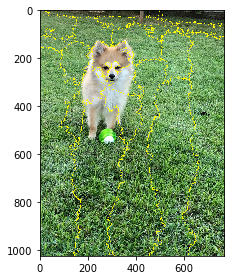

In [62]:
im_segmentation = segmentation.slic(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

<ipython-input-73-906dbc348a8e>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(image, n_segments=30, compactness=10)


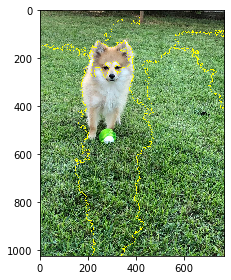

In [73]:
#your solution here

"""
https://scikit-image.org/docs/dev/api/skimage.segmentation.html#slic
"""


im_segmentation = segmentation.slic(image, n_segments=30, compactness=10)

io.imshow(segmentation.mark_boundaries(image, im_segmentation))

f) Comment what the algorithm is (in up to 3 lines).

In [ ]:
#your solution here

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

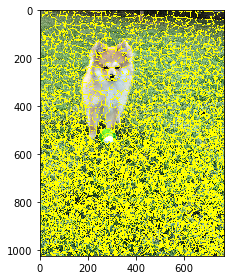

In [75]:
im_segmentation = segmentation.quickshift(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

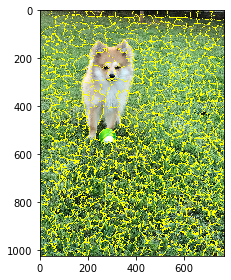

In [77]:
"""
https://scikit-image.org/docs/dev/api/skimage.segmentation.html#quickshift
"""

im_segmentation = segmentation.quickshift(image, ratio=0.5, max_dist=50)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

i) Comment what the algorithm is (in up to 3 lines).

In [ ]:
#your solution here

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

In [ ]:
#your solution here

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [ ]:
#your solution here

l) Comment the differences between each method as well as their advantages and disadvantages.

In [ ]:
#your solution here

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.